<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

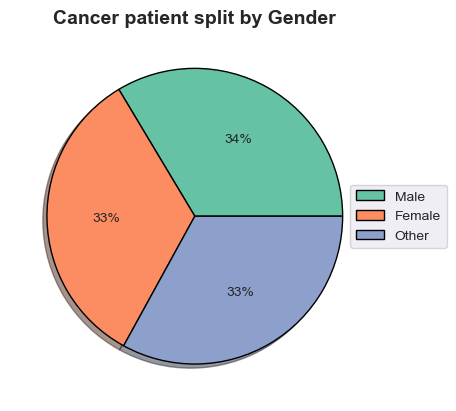

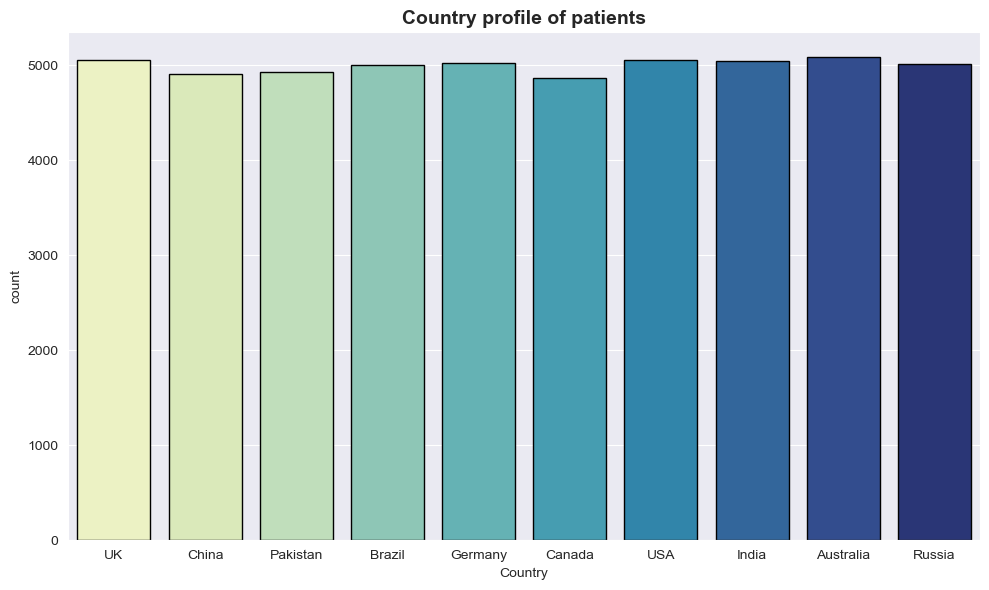

CPU times: total: 406 ms
Wall time: 420 ms


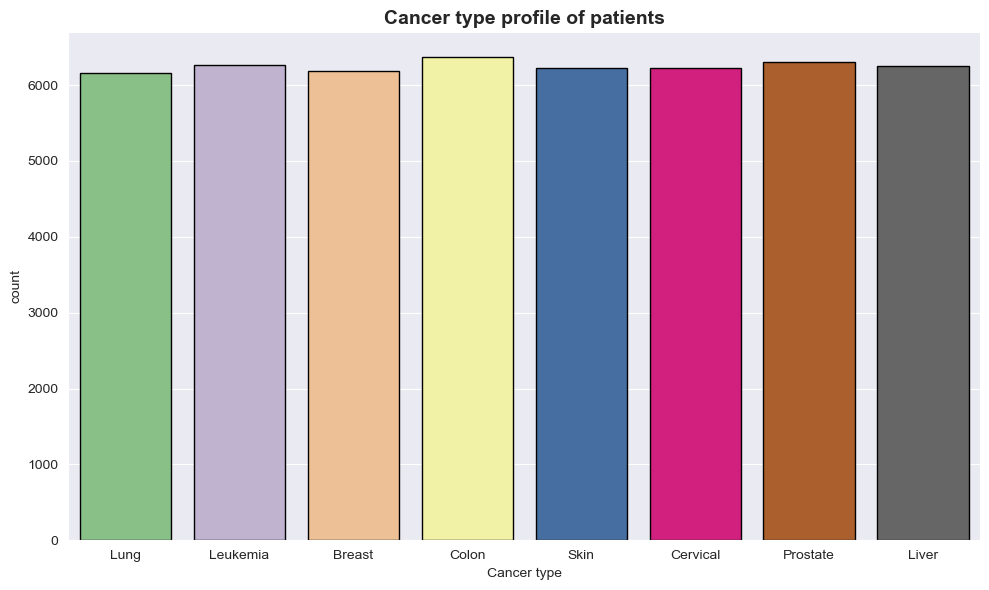

CPU times: total: 406 ms
Wall time: 418 ms


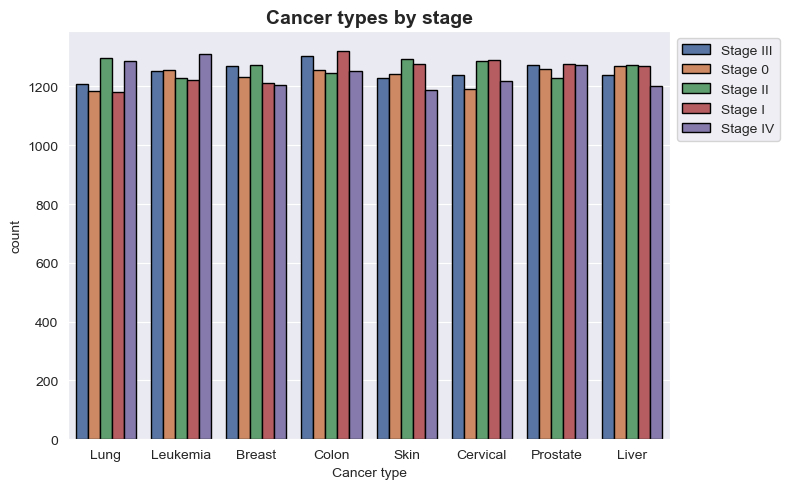

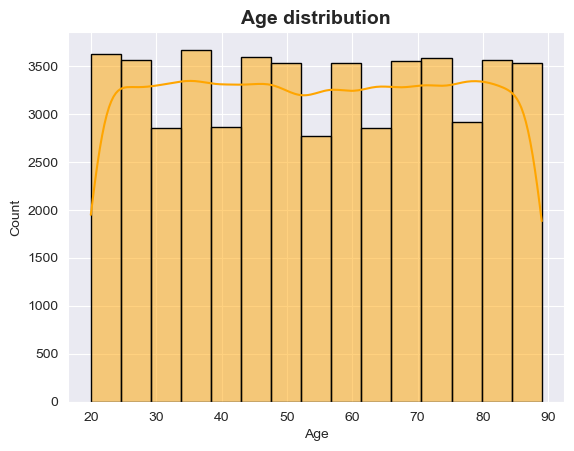

CPU times: total: 375 ms
Wall time: 375 ms


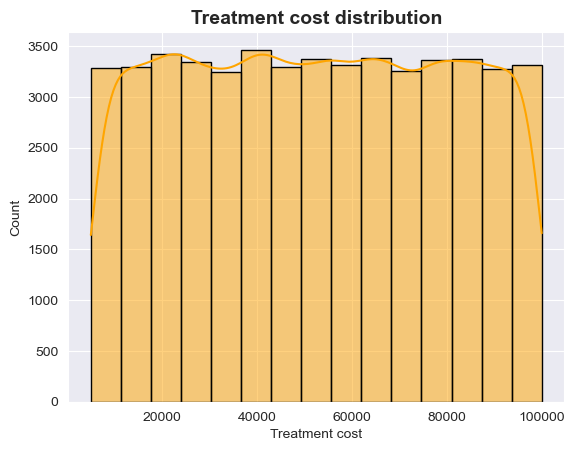

CPU times: total: 453 ms
Wall time: 458 ms


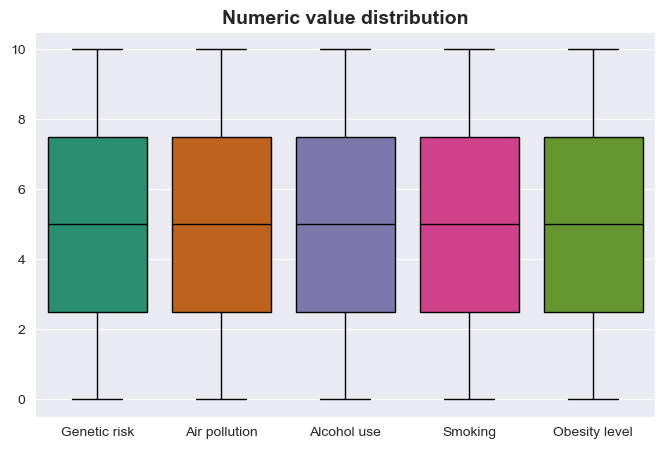

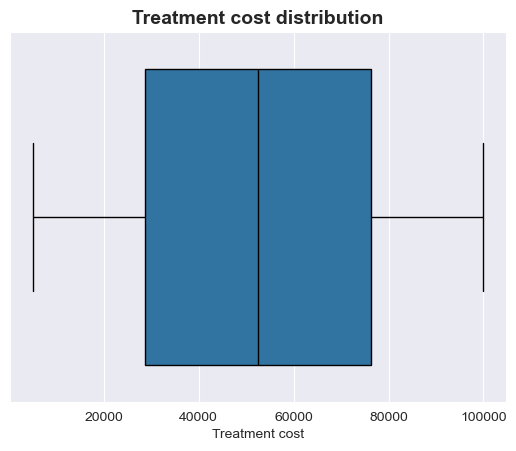

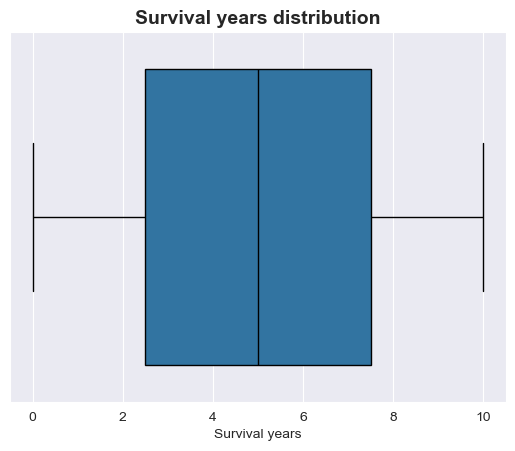

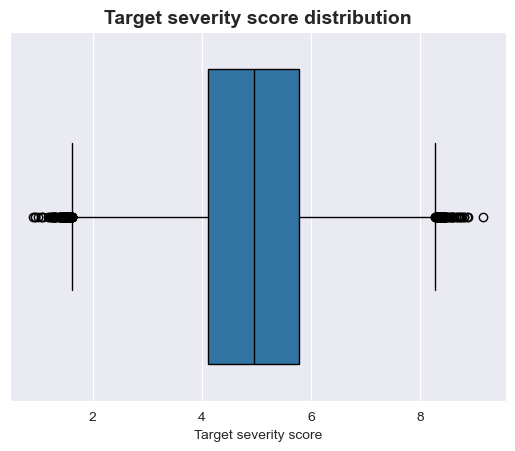

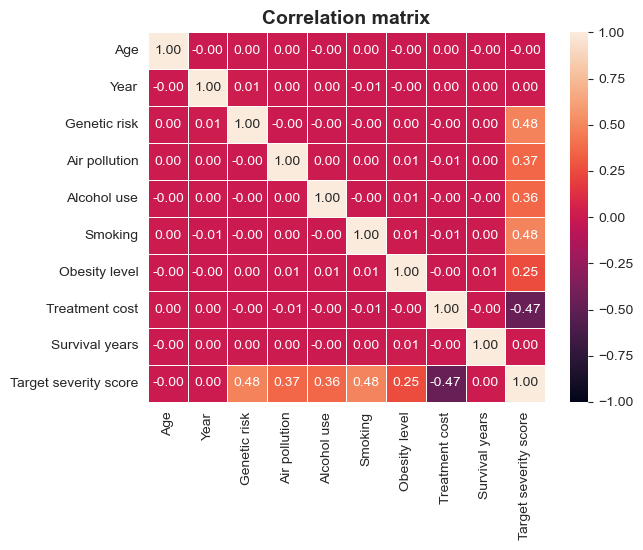

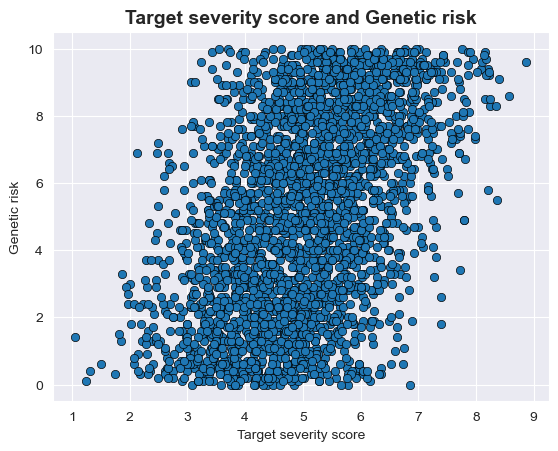

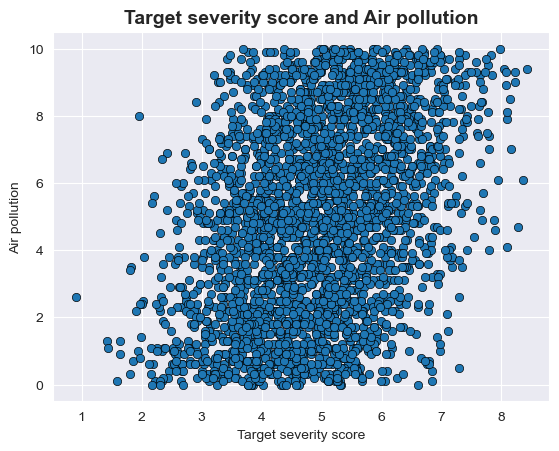

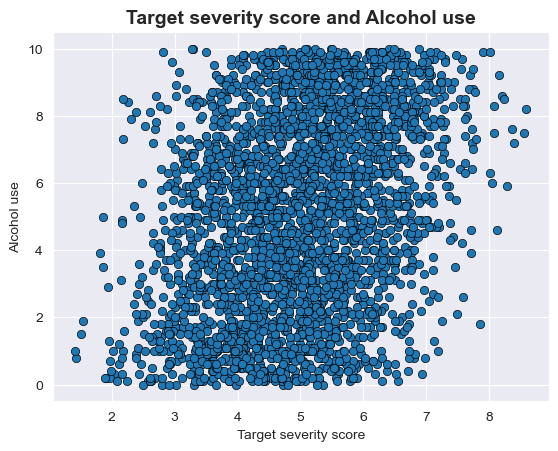

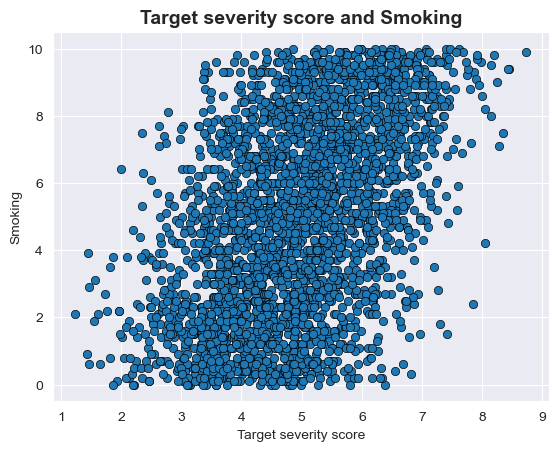

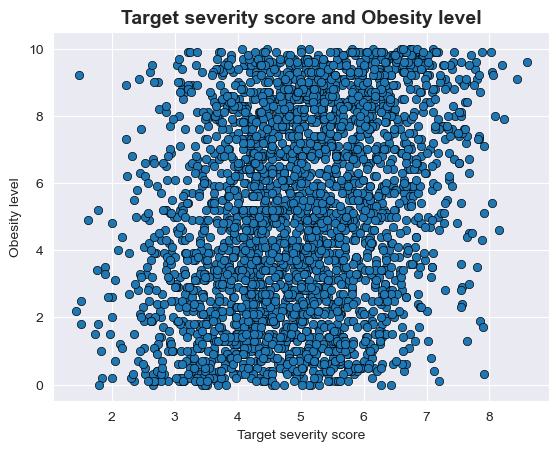

In [1]:
%run Cancer_EDA.ipynb

In [2]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, RobustScaler

In [3]:
df.head()

,Age,Gender,Country,Year,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Cancer type,Cancer stage,Treatment cost,Survival years,Target severity score
Patient_ID,,,,,,,,,,,,,,
PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


## 1. Feature encoding

Encode the categorical labels. Gender, Country, Cancer type and Cancer stage. Only cancer stage has some ordinal value.

In [4]:
# Create a copy of the new dataframe and drop the feature Year as not relevant
df_1 = df.copy()
df_1 = df_1.drop('Year', axis = 1)
df_1.head()

,Age,Gender,Country,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Cancer type,Cancer stage,Treatment cost,Survival years,Target severity score
Patient_ID,,,,,,,,,,,,,
PT0000000,71,Male,UK,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
PT0000001,34,Male,China,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
PT0000002,80,Male,Pakistan,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
PT0000003,40,Male,UK,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
PT0000004,43,Female,Brazil,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [5]:
# Encode nominal data
enc_labels = ['Gender', 'Country', 'Cancer type',]

ohe_encoder = OneHotEncoder()
ohe_fit = ohe_encoder.fit(df_1[enc_labels])
ohe_arr = ohe_encoder.transform(df_1[enc_labels]).toarray()
ohe_labels = ohe_encoder.get_feature_names_out()

In [6]:
# Encode ordinal data
ord_label = ['Cancer stage']

ord_encoder = OrdinalEncoder()
ord_fit = ord_encoder.fit(df_1[ord_label])
ord_arr = ord_encoder.transform(df_1[ord_label])
ord_labels = ord_encoder.get_feature_names_out()

In [7]:
# Step 1: Convert encoded arrays to DataFrames
ohe_df = pd.DataFrame(ohe_arr, columns = ohe_labels, index = df_1.index)
ord_df = pd.DataFrame(ord_arr, columns = ord_labels, index = df_1.index)

# Step 2: Drop original categorical columns
df_encoded = df_1.drop(columns = enc_labels + ord_label)

# Step 3: Concatenate all together
df_2 = pd.concat([df_encoded, ohe_df, ord_df], axis = 1)

# Set dataframe for scaling
df_2.head()

,Age,Genetic risk,Air pollution,Alcohol use,Smoking,Obesity level,Treatment cost,Survival years,Target severity score,Gender_Female,...,Country_USA,Cancer type_Breast,Cancer type_Cervical,Cancer type_Colon,Cancer type_Leukemia,Cancer type_Liver,Cancer type_Lung,Cancer type_Prostate,Cancer type_Skin,Cancer stage
Patient_ID,,,,,,,,,,,,,,,,,,,,,
PT0000000,71,6.4,2.8,9.5,0.9,8.7,62913.44,5.9,4.92,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
PT0000001,34,1.3,4.5,3.7,3.9,6.3,12573.41,4.7,4.65,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
PT0000002,80,7.4,7.9,2.4,4.7,0.1,6984.33,7.1,5.84,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
PT0000003,40,1.7,2.9,4.8,3.5,2.7,67446.25,1.6,3.12,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
PT0000004,43,5.1,2.8,2.3,6.7,0.5,77977.12,2.9,3.62,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, PT0000000 to PT0049999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Genetic risk           50000 non-null  float64
 2   Air pollution          50000 non-null  float64
 3   Alcohol use            50000 non-null  float64
 4   Smoking                50000 non-null  float64
 5   Obesity level          50000 non-null  float64
 6   Treatment cost         50000 non-null  float64
 7   Survival years         50000 non-null  float64
 8   Target severity score  50000 non-null  float64
 9   Gender_Female          50000 non-null  float64
 10  Gender_Male            50000 non-null  float64
 11  Gender_Other           50000 non-null  float64
 12  Country_Australia      50000 non-null  float64
 13  Country_Brazil         50000 non-null  float64
 14  Country_Canada         50000 non-null  float64
